### ETL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("./sales.csv", low_memory=False)

In [3]:
pd.to_datetime(df["order_date"])

0        2020-10-01
1        2020-10-01
2        2020-10-01
3        2020-10-01
4        2020-11-13
            ...    
286387   2021-09-30
286388   2021-09-30
286389   2021-09-30
286390   2021-09-30
286391   2021-09-30
Name: order_date, Length: 286392, dtype: datetime64[ns]

In [4]:
### function to convert string month to numbers
def monthToNum(shortMonth):
    return {
            'jan': 1,
            'feb': 2,
            'mar': 3,
            'apr': 4,
            'may': 5,
            'jun': 6,
            'jul': 7,
            'aug': 8,
            'sep': 9, 
            'oct': 10,
            'nov': 11,
            'dec': 12
    }[shortMonth]

In [72]:
df_monthGroup = df.groupby(['month'], as_index=False, sort=False )['total'].sum()
df_yearGroup = df.groupby(['year'], as_index=False, sort=True )['total'].sum()
df["monthOnly"] = df["month"].str.lower().str.slice(start=0, stop=3)

### Sales Evolution

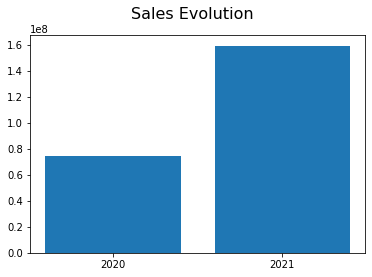

In [125]:
fig, ax = plt.subplots()
ax.bar(df_yearGroup.year.astype("str"), df_yearGroup.total)
fig.suptitle('Sales Evolution', fontsize=16)
plt.show()

### Monthly sales evolution

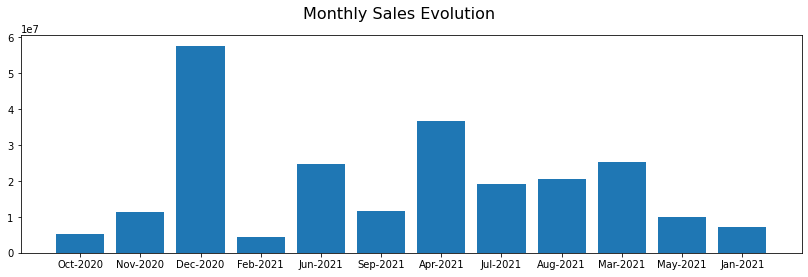

In [126]:
fig, ax = plt.subplots()
ax.bar(df_monthGroup.month, df_monthGroup.total, linewidth=0.7)
fig.set_figwidth(14)
fig.suptitle('Monthly Sales Evolution', fontsize=16)

plt.show()

### Sales per Region vs. LY

In [69]:
df2 = df.groupby(['Region', 'year'], as_index=False, sort=True)["total"].sum()

<AxesSubplot: title={'center': '2021 vs 2020 Sales per Region'}, xlabel='Region', ylabel='USD'>

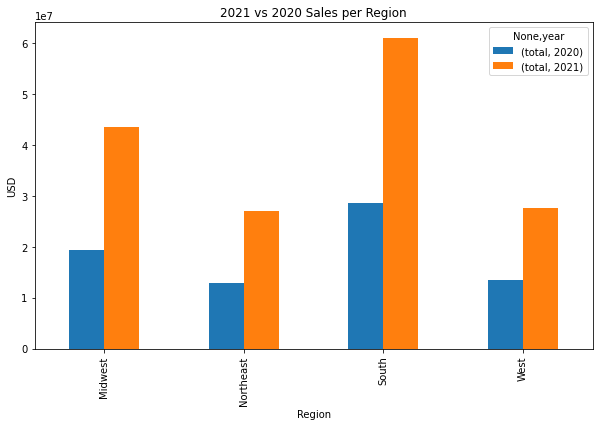

In [123]:
df3 = pd.pivot_table(df2, index = ["Region"], columns = ["year"], values = ["total"], aggfunc="sum")
df3.plot(kind="bar", title="2021 vs 2020 Sales per Region", ylabel="USD", figsize = [10,6])

### Top 10 Cities in Sales 2022

<AxesSubplot: title={'center': 'Top 10 Cities in Sales'}, xlabel='City', ylabel='USD'>

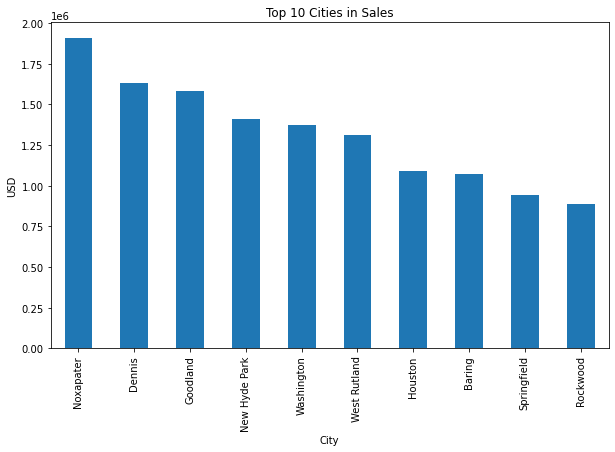

In [124]:
CitiesDF = df.loc[df["year"] == 2022,["City", "total"]].groupby("City")["total"].sum()
CitiesDF.sort_values(ascending = False).head(10).plot(kind="bar", title="Top 10 Cities in Sales", ylabel="USD", figsize = [10,6])